Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings

In [ ]:
#Importing the librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
import plotly.express as pltx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# connecting the data file
hotel_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/eda/Hotel Bookings (1).csv")

# Lets look into data

In [ ]:
# lets look into data
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In this data, we see that columns like 'company', 'children', 'country' and 'agent' have null values.

# Treating null values

In [ ]:
new_df= hotel_df.fillna(value=0)

Checking the values after replacing

In [ ]:
new_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Types of data in the dataframe
new_df.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

# **Exploring the Data**

In [ ]:
#arrival date as per month in the dataframe
new_df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

# We will see which hotel type gets more number of bookings

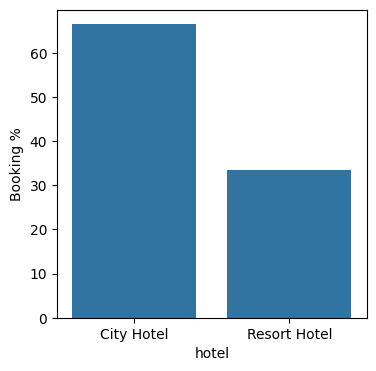

In [ ]:
grouped_hotel = new_df.groupby('hotel')
df1 = pd.DataFrame((grouped_hotel.size()/new_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
plt.figure(figsize =(4,4))
sns.barplot(x = df1['hotel'], y = df1['Booking %'])
plt.show()

**We can see that city hotel gets booking of over 60% and resort gets close to 40%**

# Lets see which type of hotel generates more revenue

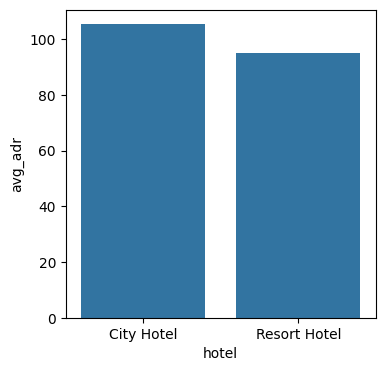

In [ ]:
# using average adr to know revenue of two hotels
df2 = grouped_hotel['adr'].agg(np.mean).reset_index().rename(columns={'adr':'avg_adr'})
plt.figure(figsize=(4,4))
sns.barplot(x=df2['hotel'],y=df2['avg_adr'])
plt.show()

**City hotels earns more than the resort hotel due to more customer bookings**

# Lets find how long do customers prefer to stay at hotel

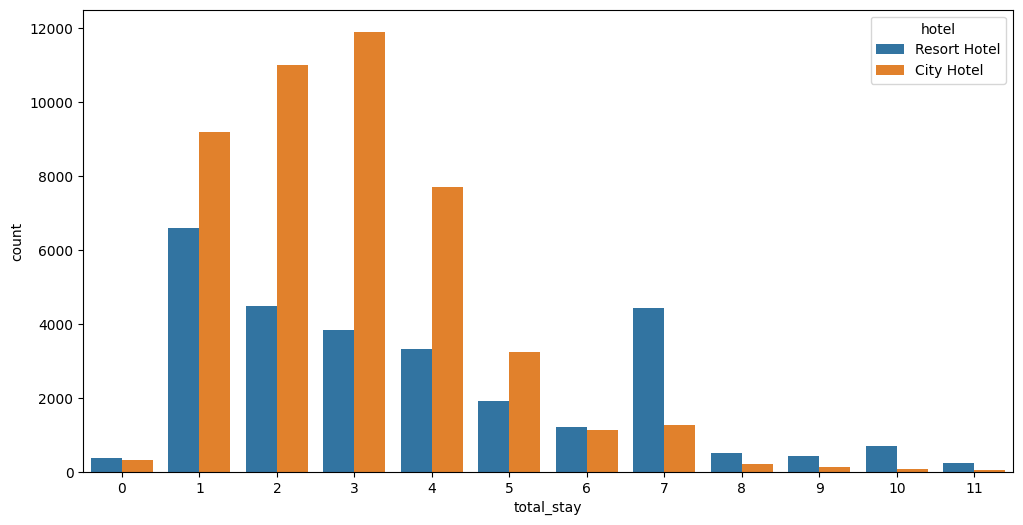

In [ ]:
# counting number of days by adding both weekends and weekdays bookings
not_cancelled = new_df[new_df['is_canceled']==0]
new_df['total_stay'] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']
st1 = not_cancelled[not_cancelled['total_stay']<12]
plt.figure(figsize = (12,6))
sns.countplot(x = st1['total_stay'], hue = st1['hotel'])
plt.show()

**Customers commonly prefer to stay for couple of days resort hotel compared to one night stay at city hotel**

# Lets see the information about month wise arrival at hotels

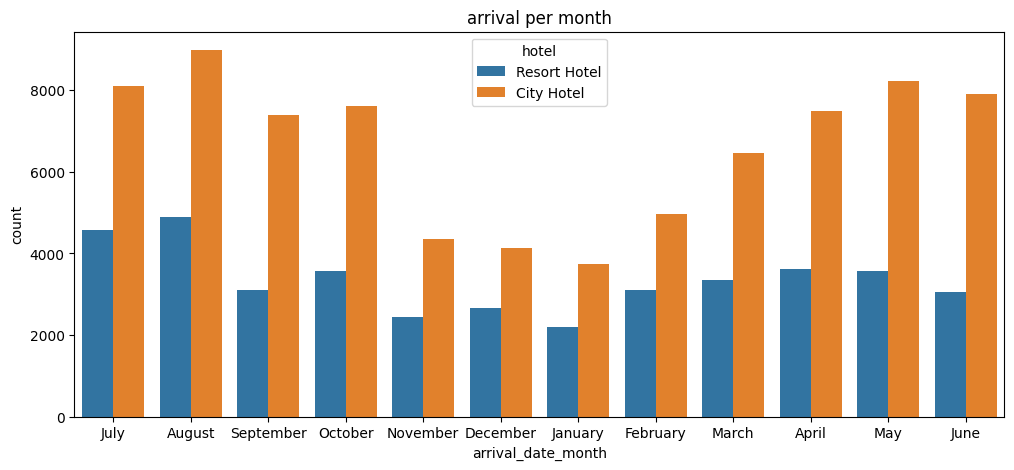

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= new_df)
plt.title('arrival per month')
plt.show()

**According to data, July and August are the months of most customers arrival**

# We will find the information about the repeating customers who visit the hotels

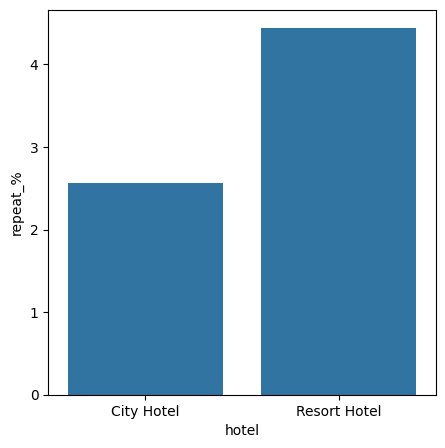

In [ ]:
# Selecting and counting repeated customers bookings
repeated_cust = new_df[new_df['is_repeated_guest'] == 1]
repeat_grp = repeated_cust.groupby('hotel')
R1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_hotel.size()
R2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
R3 = pd.concat([R1,R2], axis = 1)

# Calculating repeat %
R3['repeat_%'] = round((R3['total_repeated_guests']/R3['total_bookings'])*100,2)

plt.figure(figsize = (5,5))
sns.barplot(x = R3.index, y = R3['repeat_%'])
plt.show()

**Resort hotels get most repeated customers**

# Lets visualize the type of customers visiting the hotel

In [ ]:
new_df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

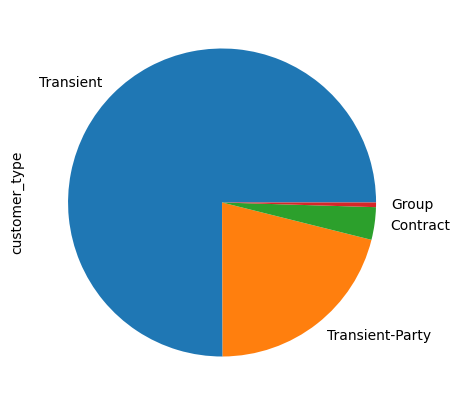

In [ ]:
plt.figure(figsize=(5,5))
new_df.customer_type.value_counts(normalize=True).plot(kind="pie")
plt.show()

**Most customers those who book hotels are transient type**

# Lets find which category customers do more bookings

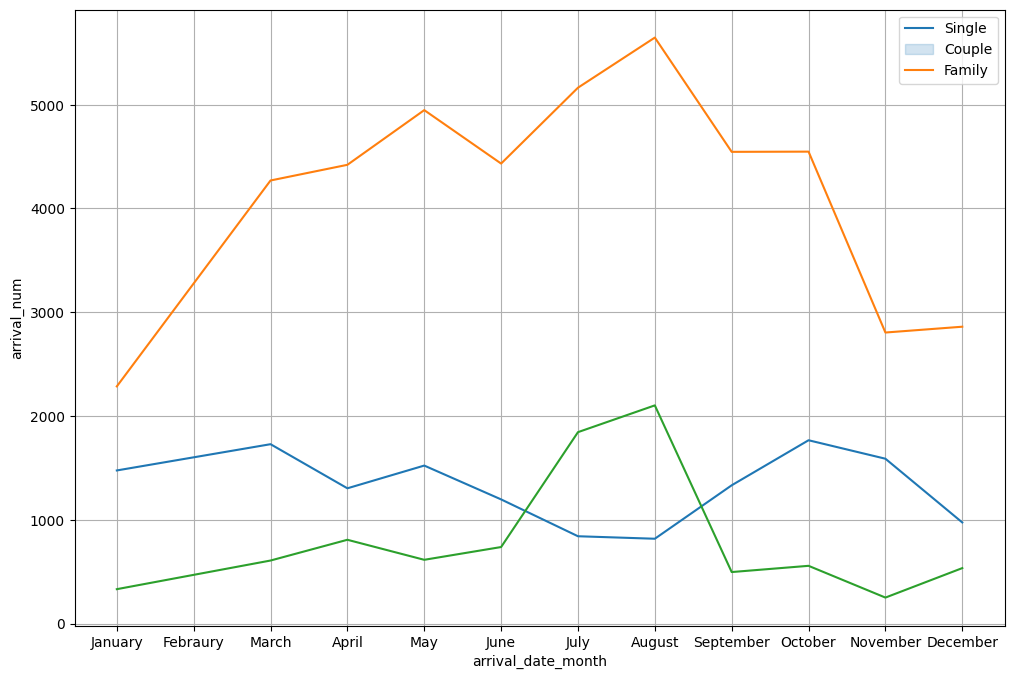

In [ ]:
# Categorising data for better visual interpret
single = not_cancelled[(not_cancelled['adults']==1) & (not_cancelled['children']==0) & (not_cancelled['babies']==0)]
couple = not_cancelled[(not_cancelled['adults']==2) & (not_cancelled['children']==0) & (not_cancelled['babies']==0)]
family = not_cancelled[not_cancelled['adults'] + not_cancelled['children'] + not_cancelled['babies']>2]

rightindex = ['January', 'Febraury', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(12,8))

for type in ['single', 'couple', 'family']:
  new_df2 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  new_df2['arrival_date_month'] = pd.Categorical(new_df2['arrival_date_month'],categories=rightindex, ordered=True)
  sns.lineplot(data= new_df2, x= 'arrival_date_month', y ='arrival_num', ax=ax)
plt.legend(['Single','Couple','Family'])
plt.grid()
plt.show()

In [ ]:
guest_countrywise = new_df[new_df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_countrywise.columns = ['country', 'No. of guests']
guest_countrywise

,country,No. of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
Base_map = folium.Map()
Guest_map = pltx.choropleth(guest_countrywise, locations = guest_countrywise['country'],
                            color = guest_countrywise['country'], hover_name = guest_countrywise['country'])
Guest_map.show()

**Its clear that europeans does most bookings**

# Understanding Market Segment

In [ ]:
new_df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

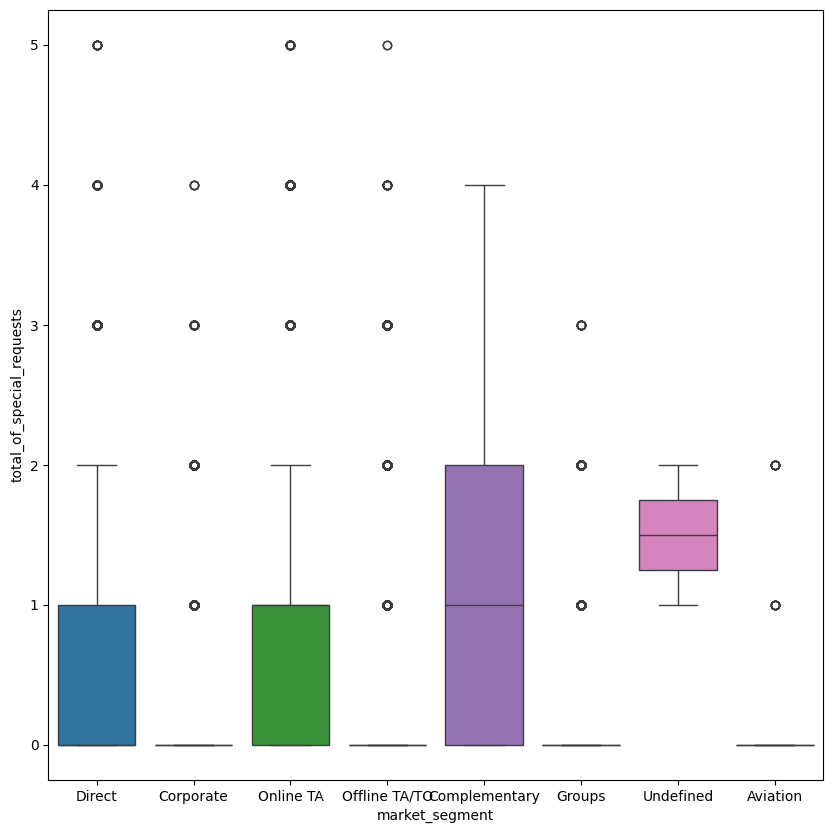

In [ ]:
# plotting special requests according to market segment.
sns.boxplot(x="market_segment", y="total_of_special_requests", hue='market_segment', data = new_df)
fig= plt.gcf()
fig.set_size_inches(10,10)

# **Conclusion**

We see that major bookings are done in cities. anyhow resort hotels too do well based on the rates they have.

From the data we can say that may to august are the busiest months as it is the summer months.

1. Data shows that city hotels get more bookings than resort hotels.
2. Even though city hotels get more bookings, resort hotels have higher repeated customers.
3. Most customers stay in hotel for fewer than 6 days and they usually prefer resort for long stay.
4. Major customers are from european nations.
5. Transient type of customers are more compared to any other type.
6. Customers book through various channels, but ta/to is the most popular channel.
7. Couples are the category with most bookings compared to family and singles bookings.